# Phase 4 Code Challenge Review

Made using resources that Max put together, thanks Max!

## Overview

- Principal Component Analysis
- Clustering
- Time Series
- Natural Language Processing

In [1]:
# Basic Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# from src.call import call_on_students

# 1) Principal Component Analysis

![pca gif saved from learnco](images/pca.gif)

## PCA Concepts

### 1: What does PCA do? 

Specifically, describe what the first principal component represents in relation to the original data.

In [ ]:
# call_on_students(1)

#### Answer: 

- Reduces dimensionality
- First component represents the linear combination that describes the most variance in the dataset (eigenvector with largest eigenvalue)
- 1st principal component explains the greatest amount of variance in the data
- Linear algebra, eigenvectors, eigenvalues for components


### 2: What are some reasons to use PCA?

In [ ]:
# call_on_students(1)

#### Answer: 
- If the dataset is too big, computation might take a long time, reducin the time without losing much variance
- Help reduce overfitting, by removing complexity
- Eliminates multi collinearity
- Visualize the data better since we can get down to 2 dimensions, easier to interpret weight of vectors
-------------------
- Addresses multicolinearity




### 3: Why is scaling important for PCA?

In [ ]:
# call_on_students(1)

#### Answer: 

- PCA is trying to find the features with the most variance and if they are on different scales, the algorithm will misunderstand their positions.
- Linear analysis require scaling to best understand variance


### 4: How can one determine how many principle components to use in a model?

In [ ]:
# call_on_students(1)

#### Answer: 

- Determine the components that still capture enough of the variance for our model to work effectively
- General rule is to capture 90%/95%
- Use scree plot


## PCA in Code

### Set Up

In [2]:
from sklearn.datasets import  load_breast_cancer

data = load_breast_cancer()
X = pd.DataFrame(data['data'], columns = data['feature_names'])
X.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


### 5: Prepare our Data for PCA

What steps do we need to take to preprocess our data effectively?

- 


In [ ]:
# call_on_students(1)

In [3]:
# Code to preprocess X
from sklearn.preprocessing import StandardScaler

scaled = StandardScaler()
scaled = scaled.fit_transform(X)

### 6: Import PCA, Then Instantiate and Fit a PCA Object

In [ ]:
# call_on_students(1)

In [10]:
# Code to import, instantiate and fit a PCA object
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(scaled)

### 7: How Much Variance is Explained by the First 2 Components?

In [11]:
# call_on_students(1)

In [12]:
# Code here to answer the question
sum(pca.explained_variance_ratio_)

0.6324320765155949

In [7]:
# Alternative
# Code to import, instantiate and fit a PCA object
from sklearn.decomposition import PCA
pca = PCA(n_components=.80)
X_pca = pca.fit_transform(scaled)

In [8]:
pca.explained_variance_ratio_.cumsum()

array([0.44272026, 0.63243208, 0.72636371, 0.79238506, 0.84734274])

In [9]:
pca.components_[0]

array([0.21890244, 0.10372458, 0.22753729, 0.22099499, 0.14258969,
       0.23928535, 0.25840048, 0.26085376, 0.13816696, 0.06436335,
       0.20597878, 0.01742803, 0.21132592, 0.20286964, 0.01453145,
       0.17039345, 0.15358979, 0.1834174 , 0.04249842, 0.10256832,
       0.22799663, 0.10446933, 0.23663968, 0.22487053, 0.12795256,
       0.21009588, 0.22876753, 0.25088597, 0.12290456, 0.13178394])

#### Answer:

- 


# 2) Clustering

## Clustering Concepts

### 8: Describe how the K-Means algorithm updates its cluster centers after initialization.

In [ ]:
# call_on_students(1)

#### Answer:

- As k-means clustering aims to converge on an optimal set of cluster centers (centroids) and cluster membership based on distance from these centroids via successive iterations, it is intuitive that the more optimal the positioning of these initial centroids, the fewer iterations of the k-means clustering algorithms will be required for convergence.

- pass it number of clusters, will create random centroids at this number
- assign datapoints to their closest centroid
- take all obvs assigned to each cluster (centroid), calculate the actual centroid of all those data points
- move our centroid points based on the calculation
- remeasure and reassign datapoints to their new closest centroid



### 9: What is inertia, and how does K-Means use inertia to determine the best estimator?

Please also describe the method you can use to evaluate clustering using inertia.

Documentation, for reference: https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

In [ ]:
# call_on_students(1)

#### Answer:

- The sum of the squared error


### 10: What other metric do we have to score the clusters which are formed?

Describe the difference between it and inertia.

In [ ]:
# call_on_students(1)

#### Answer:

- Silhouette score


## Clustering in Code with Heirarchical Agglomerative Clustering

After the above conceptual review of KMeans, let's practice coding with agglomerative clustering.


### Set Up

In [13]:
# New dataset for this section!
from sklearn.datasets import load_iris

data = load_iris()
X = pd.DataFrame(data['data'])

In [14]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       150 non-null    float64
 1   1       150 non-null    float64
 2   2       150 non-null    float64
 3   3       150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


### 11: Prepare our Data for Clustering

What steps do we need to take to preprocess our data effectively?

- 


In [15]:
# call_on_students(1)

In [16]:
# Code to preprocess the data
# Name the processed data X_processed
scaler = StandardScaler()
X_processed = scaler.fit_transform(X)

### 12: Import the Relevant Class, Then Instantiate and Fit a Hierarchical Agglomerative Clustering Object

Let's use `n_clusters = 2` to start (default)

In [17]:
# call_on_students(1)

In [18]:
# Import the relevent clustering algorithm
from sklearn.cluster import AgglomerativeClustering

In [19]:
# Fit the object
agg = AgglomerativeClustering(n_clusters=2)
agg.fit(X_processed)

AgglomerativeClustering()

In [20]:
# Calculate a silhouette score
from sklearn.metrics import silhouette_score
silhouette_score(X_processed, agg.labels_)

0.5770346019475988

### 13: Write a Function to Test Different Options for `n_clusters`

The function should take in the number for `n_clusters` and the data to cluster, fit a new clustering model using that parameter to the data, print the silhouette score, then return the labels attribute from the fit clustering model.

In [21]:
# call_on_students(1)

In [22]:
def test_n_for_clustering(n, data):
    """ 
    Tests different numbers for the hyperparameter n_clusters
    Prints the silhouette score for that clustering model
    Returns the labels that are output from the clustering model

    Parameters: 
    -----------
    n: float object
        number of clusters to use in the agglomerative clustering model
    data: Pandas DataFrame or array-like object
        Data to cluster

    Returns: 
    --------
    labels: array-like object
        Labels attribute from the clustering model
    """
    # Fit the new clustering model
    agg = AgglomerativeClustering(n_clusters=n)
    agg.fit(data)
    
    # Print the silhouette score
    print(silhouette_score(data, agg.labels_))
    
    # Return the labels attribute from the fit clustering model
    return agg.labels_

    pass

In [23]:
# Testing your function

for n in range(2, 9):
    test_n_for_clustering(n, X_processed)

0.5770346019475988
0.4466890410285909
0.4006363159855973
0.33058726295230545
0.31485480100512825
0.316969830299128
0.310946529007258


# 3) Time Series

In [41]:
# New dataset for this section!
ap = pd.read_csv('data/AirPassengers.csv')
ap.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


### 14: Prepare our Data for Time Series Analysis

What steps do we need to take to preprocess our data effectively?

- Date and time index


In [42]:
# call_on_students(1)

In [43]:
# Code here 
pd.DataFrame(data=ap['#Passengers'].values, index=pd.to_datetime(ap['Month']),columns=['#Passengers'])

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


In [44]:
# Code here 
ap.index = pd.to_datetime(ap['Month'])
ap = ap.drop('Month', axis=1)
ap.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


### 15: Explore Patterns in the Data

In [27]:
# call_on_students(1)

First: what kinds of patterns can one find in time series data?

- Trend: linear, exponential 
- Seasonal: changes over times of the year
- Cyclicity: trends that happen over and over again in a cycle
- Irregular


Second, plot this time series data. What kinds of patterns do you see in this dataset?

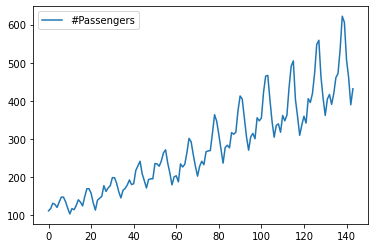

In [28]:
# Code to plot the time series
ap.plot();

### 16: Explore the Moving Average

What window would make sense to use for this data?

- a 12 month window


In [29]:
# call_on_students(1)

In [30]:
# Code to create the moving average
roll_mean = ap.rolling(12).mean()

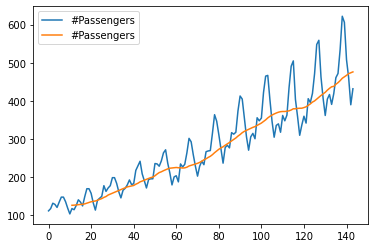

In [31]:
# Add to the moving average to the above plot
ax = ap.plot()
roll_mean.plot(ax=ax);


### 17: Explore Stationarity


In [ ]:
# call_on_students(1)

Why do we try to make our data stationary?

- 


What can we do to make our data stationary?

- 


### 18: Check Stationarity

In [ ]:
# call_on_students(1)

In [47]:
# Code here to check if the data is stationary
from statsmodels.tsa.stattools import adfuller
pvalue = adfuller(ap)
print(f"{pvalue[1]}\n")
print(f"{pvalue}")

0.991880243437641

(0.8153688792060463, 0.991880243437641, 13, 130, {'1%': -3.4816817173418295, '5%': -2.8840418343195267, '10%': -2.578770059171598}, 996.692930839019)


### 19: Try to Make the Data Stationarity

Implement one strategy to try to make the data more stationary, then check if it worked.

In [ ]:
# call_on_students(1)

In [36]:
# Code here to try to make the data stationary
ap3 = ap.diff(1).dropna()

In [37]:
# Code here to check if the data is stationary
pvalue = adfuller(ap3)[1]
pvalue

0.054213290283826474

In [49]:
print(f"Not stationary because the pvalue > .05")

Not stationary because the pvalue > .05


In [38]:
ap

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


In [39]:
ap.diff(1).cumsum() + 112

,#Passengers
Month,
1949-01-01,NaN
1949-02-01,118.0
1949-03-01,132.0
1949-04-01,129.0
1949-05-01,121.0
...,...
1960-08-01,606.0
1960-09-01,508.0
1960-10-01,461.0


<a id='clust'></a>

# 4) Natural Language Processing

## NLP Concepts

### Some Example Text

In [ ]:
# Each sentence is a document
sentence_one = "Harry Potter is the best young adult book about wizards"
sentence_two = "Um, EXCUSE ME! Ever heard of Earth Sea?"
sentence_three = "I only like to read non-fiction.  It makes me a better person."

# The corpus is composed of all of the documents
corpus = [sentence_one, sentence_two, sentence_three]

### 20: NLP Pre-processing

List at least three steps you can take to turn raw text like this into something that would be semantically valuable (aka ready to turn into numbers):

In [ ]:
# call_on_students(1)

#### Answer:

1. Lowercase
2. Remove punctuation
3. stopwordfs

### 21: Describe what vectorized text would look like as a dataframe.

If you vectorize the above corpus, what would the rows and columns be in the resulting dataframe (aka document term matrix)

In [ ]:
# call_on_students(1)

#### Answer:

- 


### 22: What does TF-IDF do?

Also, what does TF-IDF stand for?

In [ ]:
# call_on_students(1)

#### Answer:

- 


## NLP in Code

### Set Up

In [ ]:
# New section, new data
policies = pd.read_csv('data/2020_policies_feb_24.csv')

def warren_not_warren(label):
    
    '''Make label a binary between Elizabeth Warren
    speeches and speeches from all other candidates'''
    
    if label =='warren':
        return 1
    else:
        return 0
    
policies['candidate'] = policies['candidate'].apply(warren_not_warren)

The dataframe loaded above consists of policies of 2020 Democratic presidential hopefuls. The `policy` column holds text describing the policies themselves.  The `candidate` column indicates whether it was or was not an Elizabeth Warren policy.

In [ ]:
policies.head()

The documents for activity are in the `policy` column, and the target is candidate. 

### 23: Import the Relevant Class, Then Instantiate and Fit a Count Vectorizer Object

In [ ]:
# call_on_students(1)

In [ ]:
# First! Train-test split the dataset
from sklearn.model_selection import train_test_split

# Code here to train test split

In [ ]:
# Import the relevant vectorizer

In [ ]:
# Instantiate it

In [ ]:
# Fit it

### 24: Vectorize Your Text, Then Model

In [ ]:
# call_on_students(1)

In [ ]:
# Code here to transform train and test sets with the vectorizer

In [ ]:
# Importing the classifier...
from sklearn.ensemble import RandomForestClassifier

# Code here to instantiate and fit a Random Forest model


In [ ]:
# Code here to evaluate your model on the test set